# Day 9: Logistic Regression Examples in Python


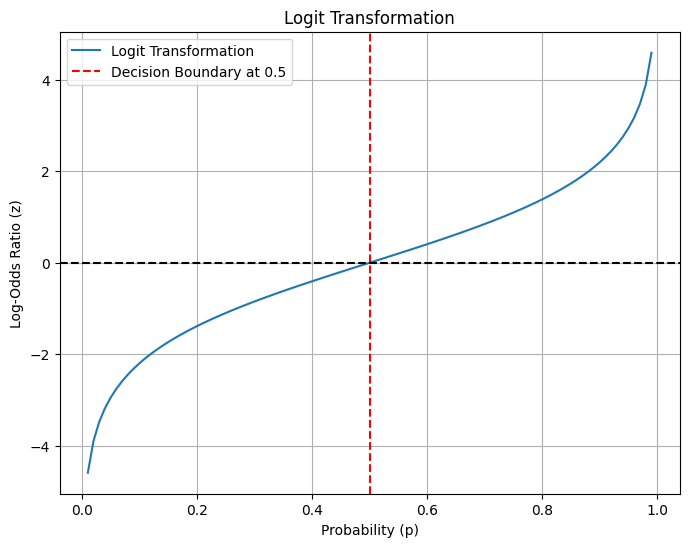

In [2]:
# 1. Logit Function Visualization
import numpy as np
import matplotlib.pyplot as plt

def logit(p):
    return np.log(p / (1 - p))

p_values = np.linspace(0.01, 0.99, 100)
logit_values = logit(p_values)

plt.figure(figsize=(8, 6))
plt.plot(p_values, logit_values, label="Logit Transformation")
plt.axhline(y=0, color='black', linestyle='--')
plt.axvline(x=0.5, color='red', linestyle='--', label='Decision Boundary at 0.5')
plt.xlabel('Probability (p)')
plt.ylabel('Log-Odds Ratio (z)')
plt.title('Logit Transformation')
plt.legend()
plt.grid(True)
plt.show()

In [3]:
# 2. Logistic Regression on Tumor Example
from sklearn.linear_model import LogisticRegression
X = np.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88]).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
logr = LogisticRegression()
logr.fit(X, y)
print("Tumor prediction for size 5.45:", logr.predict([[5.45]]))

Tumor prediction for size 5.45: [1]


In [4]:
# 3. Logistic Regression on Diabetes Dataset
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc


In [5]:
# Prepare dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
y_binary = (y > np.median(y)).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 73.03%
Confusion Matrix:
 [[36 13]
 [11 29]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.73      0.75        49
           1       0.69      0.72      0.71        40

    accuracy                           0.73        89
   macro avg       0.73      0.73      0.73        89
weighted avg       0.73      0.73      0.73        89



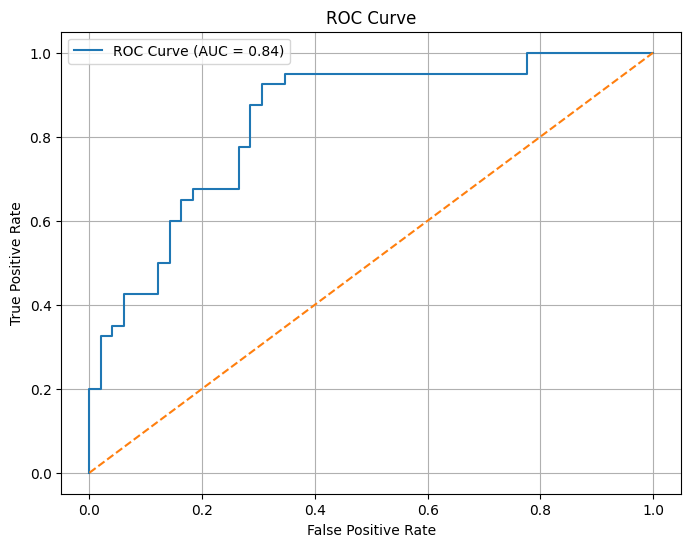

In [6]:
# ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
from google.colab import files
uploaded = files.upload()


Saving framingham.csv to framingham.csv


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load and clean data
df = pd.read_csv("framingham.csv")
df.drop(columns=['education'], inplace=True)
df.rename(columns={'male': 'Sex_male'}, inplace=True)
df.dropna(inplace=True)

# Check class balance
print("Class Distribution:\n", df['TenYearCHD'].value_counts())

# Ensure enough samples from both classes
if df['TenYearCHD'].value_counts().min() < 2:
    print(" Not enough data for one of the classes. Logistic Regression requires at least 2 samples per class.")
else:
    # Prepare features and labels
    X = df[['age', 'Sex_male', 'cigsPerDay', 'totChol', 'sysBP', 'glucose']].values
    y = df['TenYearCHD'].values

    # Stratified Split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=4, stratify=y
    )

    # Model training
    logreg = LogisticRegression(max_iter=1000)
    logreg.fit(X_train, y_train)

    # Predictions
    y_pred = logreg.predict(X_test)

    # Evaluation
    print('Heart Disease Model Accuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred) * 100))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(pd.DataFrame(cm, columns=['Predicted:0', 'Predicted:1'],
                            index=['Actual:0', 'Actual:1']), annot=True, fmt='d', cmap='Greens')
    plt.title('Heart Disease Prediction Confusion Matrix')
    plt.show()


Class Distribution:
 TenYearCHD
0    4
1    1
Name: count, dtype: int64
 Not enough data for one of the classes. Logistic Regression requires at least 2 samples per class.
